손글씨 MNIST 데이터를 다음 4가지의 머신러닝 알고리즘으로 분류 수행하고 그 성과를 비교한다. 
* 의사결정나무
* 랜덤포래스트
* 인공신경망 (완전연결 2층 신경망)
* 합성곱 신경망

# 0 . 필요 라이브러리 import

In [1]:
# 0. 분석 필요 라이브러리 적재

# 머신러닝 알고리즘: 의사결정나무, 랜덤포래스트 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

# 인공신경망 : ANN-인공신경망,  CNN-합성곱 신경망
from tensorflow import keras

# MNIST 데이터 : 손글씨 데이터 
from tensorflow.keras.datasets import mnist

# 그래프 출력용
import matplotlib.pyplot as plt  # 학습곡선, 정확도 비교
from sklearn.tree import plot_tree  # 의사결정나무


# 1 . 데이터 적재 및 전처리

In [2]:
# 1.1 keras 라이브러리에서 제공하는 MNIST 데이터셋 로드
#     학습데이터 train 60,000개 시험데이터 test 10,000개
#     입력 X_ 정답 y_

(X_train, y_train), (X_test, y_test) = mnist.load_data()   
    # train: 60000, test:10000

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# 1.2  MNIST 데이터 크기 
print ('X_train:', X_train.shape, ', y_train:', y_train.shape)
print ('X_test :', X_test.shape,  ', y_test :', y_test.shape)

X_train: (60000, 28, 28) y_train: (60000,)
X_test : (10000, 28, 28) y_test : (10000,)


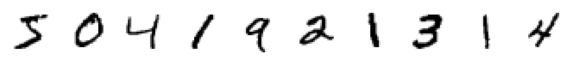

정답 y = [5 0 4 1 9 2 1 3 1 4]


In [4]:
# 1.3 첫 10개 이미지 출력
fig, axs = plt.subplots(1, 10, figsize = (10,10))
for i, axe in enumerate(axs.flat) :
  axe.imshow(X_train[i], cmap = 'gray_r')
  axe.axis('off')

plt.show()

print('정답 y =', y_train[:10])

In [5]:
# 1.4  입력 데이터의 가공 : 데이터의 정규화 (0~1) 및 1차원 배열로 정리, 검증데이터 분리리

# 1.4.1 데이터 정규화 (ANN, CNN)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# 1.4.2 데이터 정규화 + 일렬화 (DT, RF) 
X_train_flatten = X_train_scaled.reshape(-1, 28*28 )
X_test_flatten = X_test_scaled.reshape(-1, 28*28 )

# 1.4.4 데이터 형태 확인인
print('X_train.shape=', X_train.shape)
print('X_train_flatten.shape=', X_train_flatten.shape)

X_train.shape= (60000, 28, 28)
X_train_flatten.shape= (60000, 784)


# 2 . 머신러닝 수행

## 2.1 의사결정나무 DT

In [6]:
# 2.1 의사결정나무 분류 알고리즘을 이용하여 학습 후 정확도 확인
# from sklearn.tree import DecisionTreeClassifier

# 2.1.1 알고리즘 호출
dt = DecisionTreeClassifier( random_state = 42)

# 2.1.2 교차검증 학습 수행 (약 2분 정도 실행)
dt.fit(  X_train_flatten ,    # 학습 입력값 
         y_train)             # 학습 정답
                           
# 2.1.3 학습결과 정확도 출력
acc_train_dict = dict()  # 모델별 학습/시험험 정확도 저장
acc_test_dict = dict()

acc_train_dict.update({'dt': dt.score(X_train_flatten, y_train)})
acc_test_dict.update( {'dt': dt.score(X_test_flatten, y_test)})

print ('Decision Tree Train Accuracy :', acc_train_dict['dt'])
print ('Decision Tree Test Accuracy :', acc_test_dict['dt'])

Decision Tree Train Accuracy : 1.0
Decision Tree Test Accuracy : 0.8754


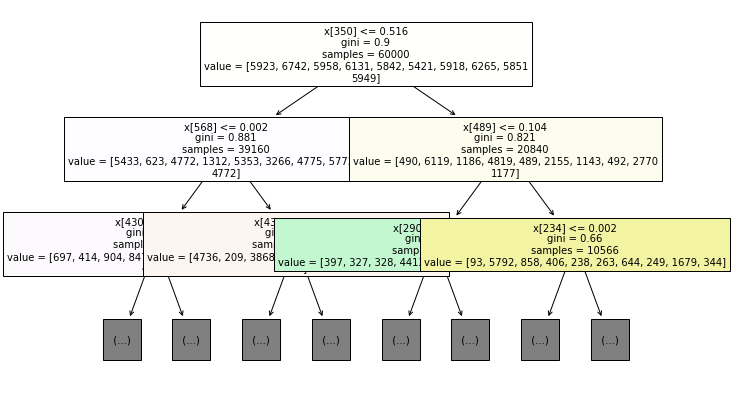

In [12]:
# 2.2 의사결정나무 분류 결과의 시각화

# from sklearn.tree import plot_tree

plt.figure(figsize = (10,7))
plot_tree(dt, max_depth = 2, filled = True, fontsize = 10)
plt.show()

## 2.2 랜덤포래스트 RF

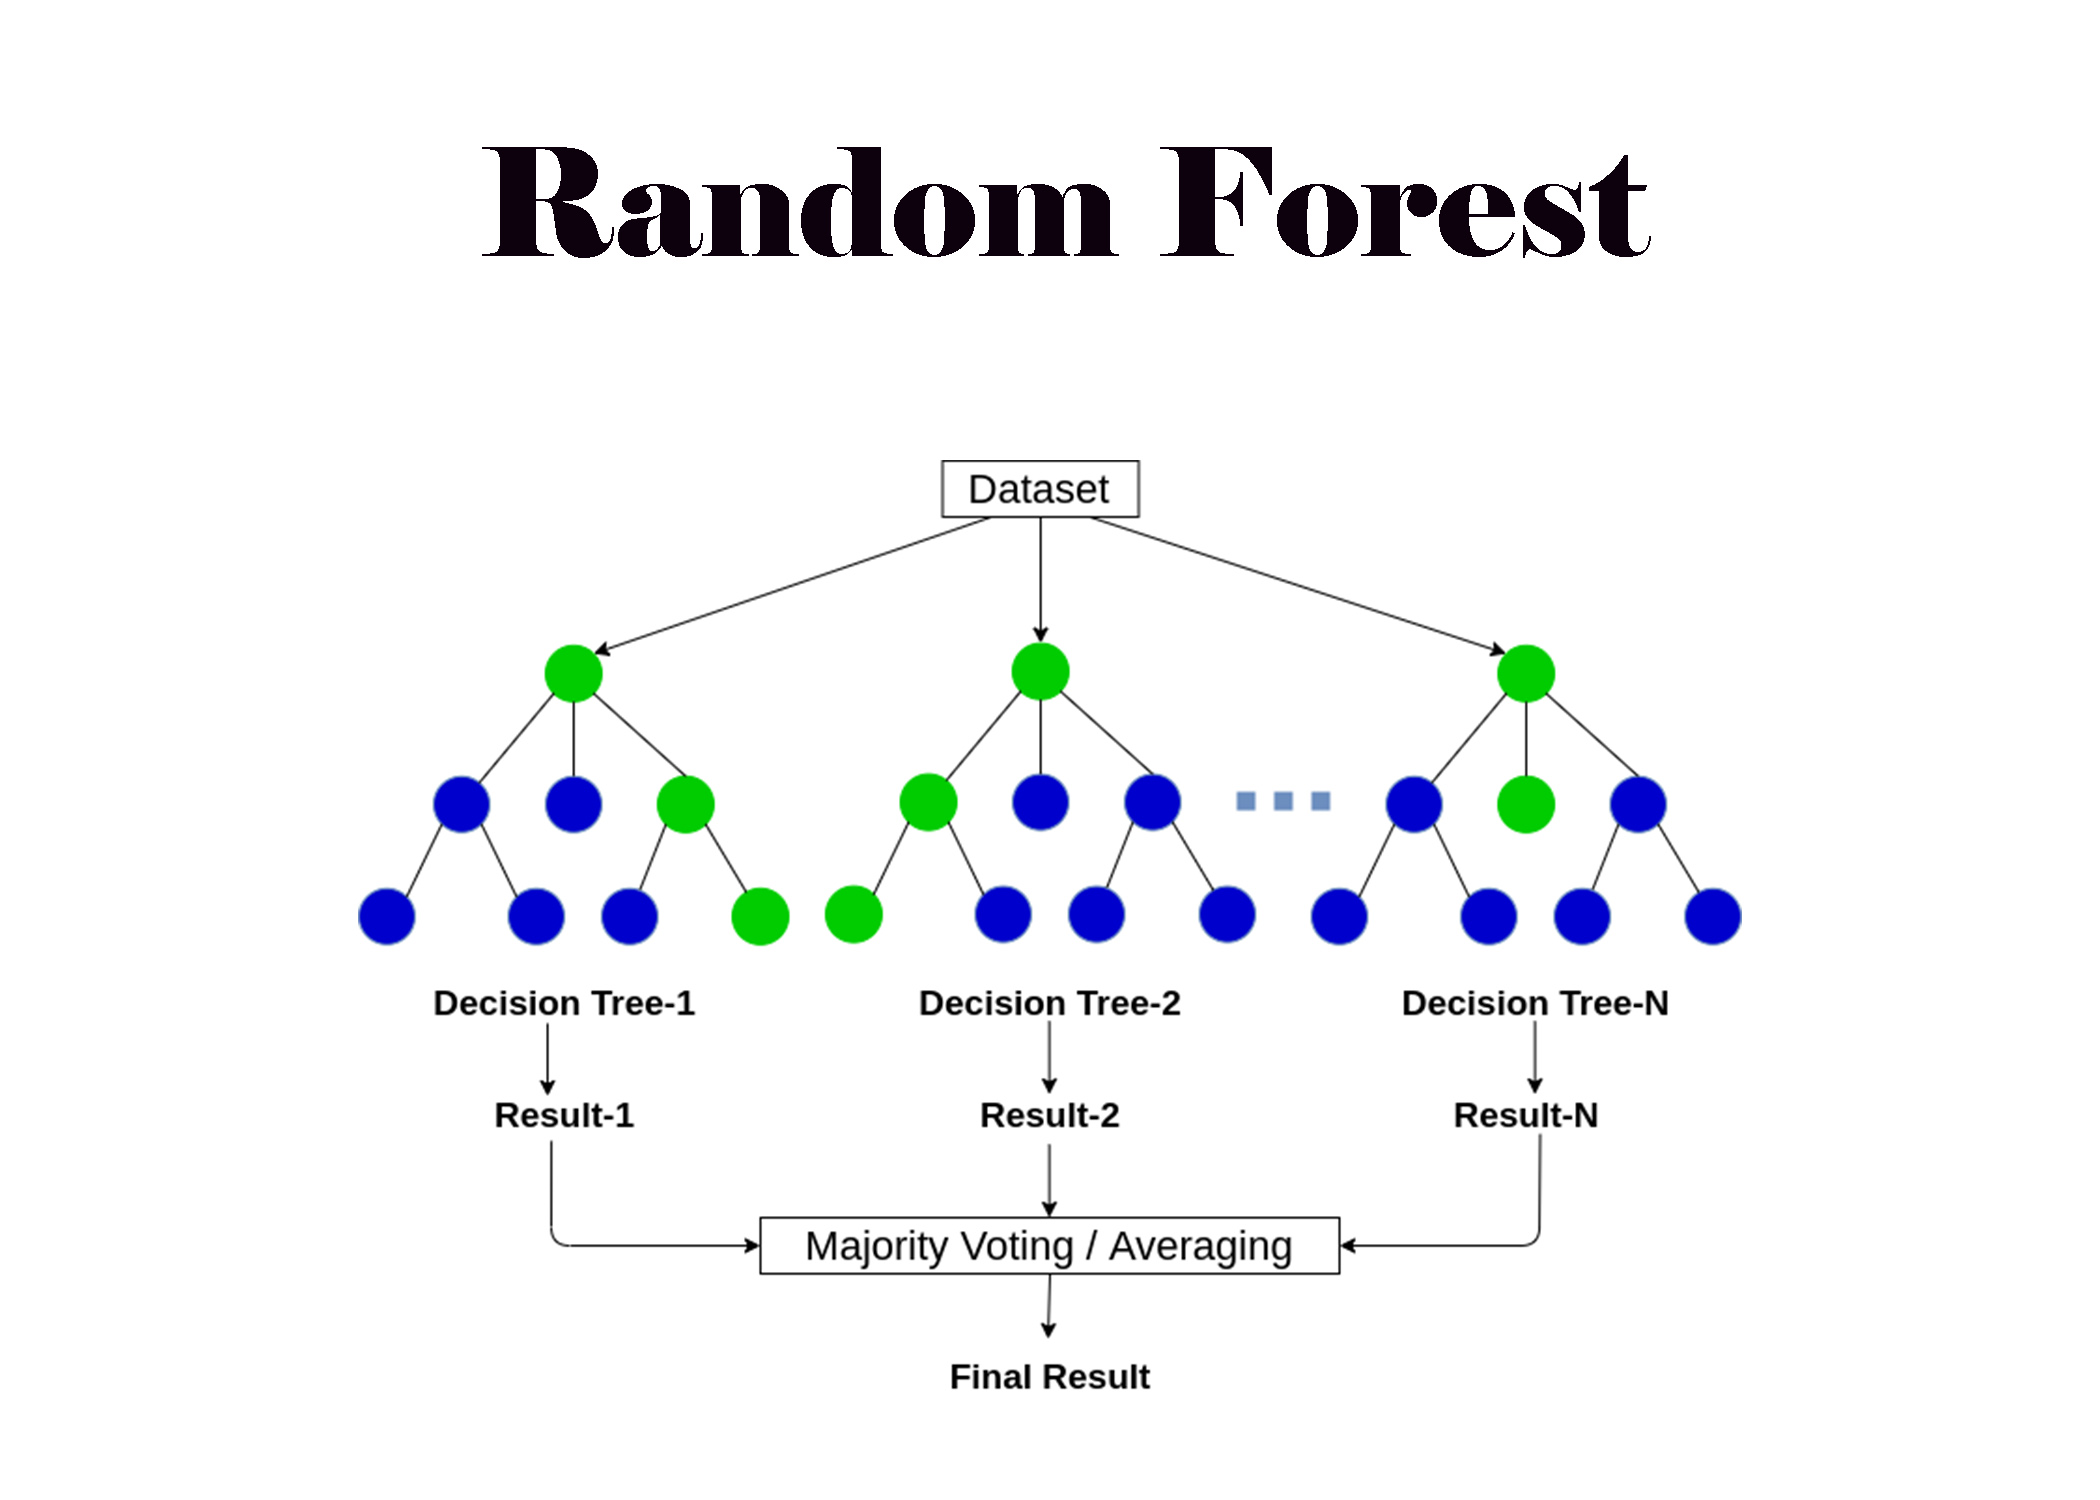

In [17]:
# 2.2 랜덤포래스트 분류 알고리즘을 이용하여 학습 후 정확도 확인
# from sklearn.ensemble import RandomForestClassifier

# 2.2.1 알고리즘 호출
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)

# 2.2.2 교차검증 학습 수행 (약 2분 정도 실행)
rf.fit( X_train_flatten ,        # 학습 입력값 
        y_train)                 # 학습 정답
                 
# 2.2.3 학습결과 정확도 출력
acc_train_dict.update({'rf' : rf.score(X_train_flatten, y_train)})
acc_test_dict.update( {'rf' : rf.score(X_test_flatten, y_test)})

print ('Random Forest Train Accuracy :', acc_train_dict['rf'])
print ('Random Forest Test Accuracy :', acc_test_dict['rf'])

Random Forest Train Accuracy : 0.9991833333333333
Random Forest Test Accuracy : 0.9492


## 2.3 인공신경망 ANN

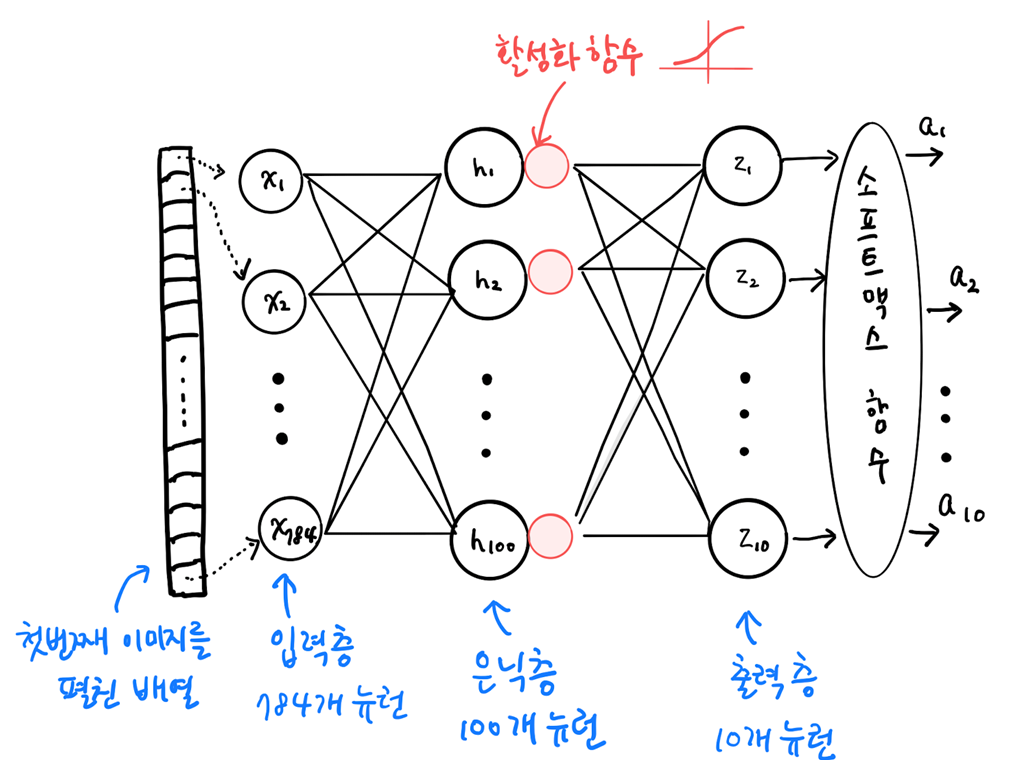

In [18]:
# 2.3 인공신경망을 이용한 분류
# from tensorflow import keras

# 2.3.1 신경망 정의 
# 신경망 층을 조립하여 구성 
model_ann = keras.Sequential([
              keras.layers.Flatten (input_shape =(28,28), 
                                    name = 'flatten_ann'),
              keras.layers.Dense(100, activation= 'sigmoid',
                                 name = 'hidden_ann'),
             # keras.layers.Dropout(0.3, name = 'dropout_ann'),                
              keras.layers.Dense(10, activation = 'softmax', 
                                 name = 'output_ann')
], name = 'ANN_MNIST_Model')

# 신경망 구성 정보 출력
model_ann.summary()

Model: "ANN_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_ann (Flatten)       (None, 784)               0         
                                                                 
 hidden_ann (Dense)          (None, 100)               78500     
                                                                 
 output_ann (Dense)          (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 2.3.2 인공신경망에 의한 학습 수행

# 모델 설정 지정
model_ann.compile(optimizer = 'adam', 
                  loss = 'sparse_categorical_crossentropy', 
                  metrics = 'accuracy')

# 훈련 수행
history_ann = model_ann.fit(X_train_scaled, y_train, 
                            epochs= 20,
                            validation_data = (X_test_scaled, y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4184 - accuracy: 0.8935 - val_loss: 0.2322 - val_accuracy: 0.9317
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2042 - accuracy: 0.9415 - val_loss: 0.1715 - val_accuracy: 0.9511
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1537 - accuracy: 0.9562 - val_loss: 0.1448 - val_accuracy: 0.9567
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1216 - accuracy: 0.9652 - val_loss: 0.1236 - val_accuracy: 0.9632
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0994 - accuracy: 0.9722 - val_loss: 0.1070 - val_accuracy: 0.9691
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0821 - accuracy: 0.9770 - val_loss: 0.0975 - val_accuracy: 0.9693
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0699 - accuracy: 0.9808 - val_loss: 0.0914 - val_accura

In [20]:
# 2.3.3 학습결과 정확도 출력 (ANN)
acc_train_dict.update({'ann' : history_ann.history['accuracy'][-1]})
acc_test_dict.update({'ann' : history_ann.history['val_accuracy'][-1]})

print ('ANN Train Accuracy :', acc_train_dict['ann'])
print ('ANN Test Accuracy :', acc_test_dict['ann'])

ANN Train Accuracy : 0.9988166689872742
ANN Test Accuracy : 0.9750000238418579


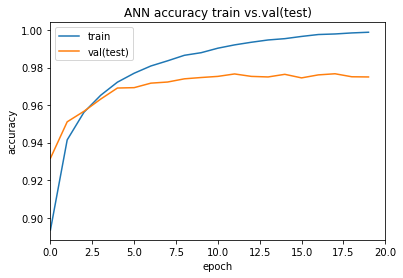

In [21]:
# 2.3.4 학습곡선 정확도 출력 (ANN)
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.title ('ANN accuracy train vs.val(test)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val(test)'])
plt.xlim(0,20)
plt.show()

## 2.4 합성곱 신경망 CNN
* 이미지 정보 처리에 적합한 인공신경망 

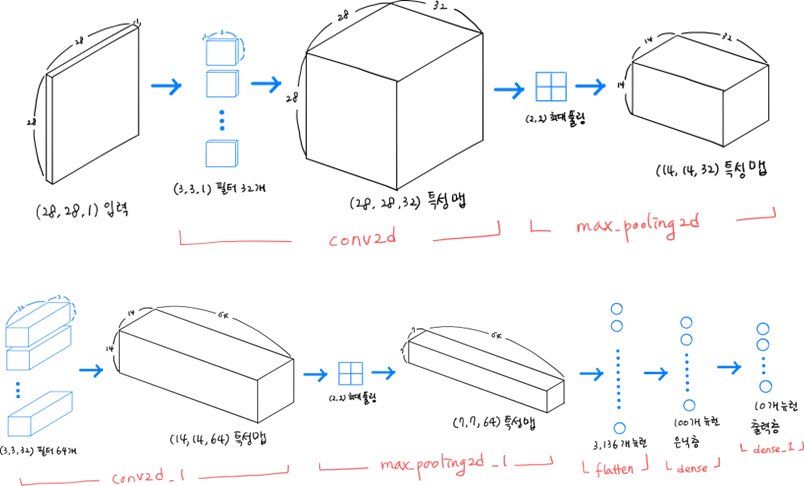

In [23]:
# 2.4 합성곱 신경망을 이용한 분류
# from tensorflow import keras

# 2.4.1 합성곱 신경망 정의 
# 신경망 층을 조립하여 구성 

model_cnn = keras.Sequential([
              keras.layers.Conv2D(32, kernel_size=3, activation = 'relu',
                                  padding = 'same', name = '1st_conv_cnn',
                                  input_shape = (28,28,1)),
              keras.layers.MaxPooling2D(2 , name = '1st_pool_cnn'),
              keras.layers.Conv2D (64, kernel_size = 3, activation = 'relu',
                                   padding = 'same', name = '2nd_conv_cnn'),
              keras.layers.MaxPooling2D(2, name = '2nd_pool_cnn'),
              keras.layers.Flatten(name='flatten_cnn'),
              keras.layers.Dense(100, activation = 'relu', name = 'dense_cnn'),
              keras.layers.Dropout(0.4, name= 'dropout_cnn'),
              keras.layers.Dense(10, activation = 'softmax', name = 'output_cnn')
], name = 'CNN_MNIST_Model')

# 합성곱 신경망 구성 정보 출력
model_cnn.summary()

Model: "CNN_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_conv_cnn (Conv2D)       (None, 28, 28, 32)        320       
                                                                 
 1st_pool_cnn (MaxPooling2D)  (None, 14, 14, 32)       0         
                                                                 
 2nd_conv_cnn (Conv2D)       (None, 14, 14, 64)        18496     
                                                                 
 2nd_pool_cnn (MaxPooling2D)  (None, 7, 7, 64)         0         
                                                                 
 flatten_cnn (Flatten)       (None, 3136)              0         
                                                                 
 dense_cnn (Dense)           (None, 100)               313700    
                                                                 
 dropout_cnn (Dropout)       (None, 100)           

In [24]:
# 2.4.2 합성곱곱신경망에 의한 학습 수행

# 모델 설정 지정
model_cnn.compile(optimizer = 'adam', 
                  loss = 'sparse_categorical_crossentropy', 
                  metrics = 'accuracy')

# 훈련 수행
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping (patience = 2, 
                                                   restore_best_weights = True)

history_cnn = model_cnn.fit(X_train_scaled, y_train, 
                            epochs= 20,
                            validation_data = (X_test_scaled, y_test),
                            callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1975 - accuracy: 0.9391 - val_loss: 0.0457 - val_accuracy: 0.9856
Epoch 2/20
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0748 - accuracy: 0.9786 - val_loss: 0.0375 - val_accuracy: 0.9872
Epoch 3/20
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0550 - accuracy: 0.9836 - val_loss: 0.0320 - val_accuracy: 0.9893
Epoch 4/20
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0441 - accuracy: 0.9871 - val_loss: 0.0254 - val_accuracy: 0.9916
Epoch 5/20
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.0257 - val_accuracy: 0.9919
Epoch 6/20
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0275 - val_accuracy: 0.9905


In [25]:
# 2.4.3 학습결과 정확도 출력 (CNN)
acc_train_dict.update({'cnn' : history_cnn.history['accuracy'][-1]})
acc_test_dict.update({'cnn' : history_cnn.history['val_accuracy'][-1]})

print ('CNN Train Accuracy :', acc_train_dict['cnn'])
print ('CNN Test Accuracy :', acc_test_dict['cnn'])

CNN Train Accuracy : 0.9906166791915894
CNN Test Accuracy : 0.9904999732971191


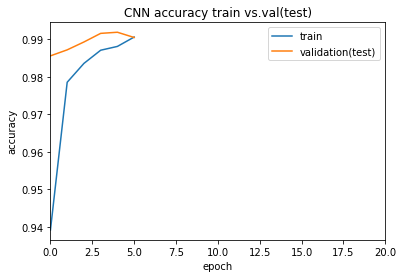

In [26]:
# 2.4.4 학습곡선 정확도 출력 (CNN)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title ('CNN accuracy train vs.val(test)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation(test)'])
plt.xlim(0,20)
plt.show()

# 3 . 시험데이터 평가 및 수행결과 비교

In [27]:
# 3.1 학습데이터와 시험 데이터의 정확도를 이용하여 분류 모델별 성능을 비교한다. 

print (f'{"model":^8}{"train":^8}{"test":^8}')
for k in acc_train_dict.keys() :
  print (f'{k:^8}{acc_train_dict[k]:^8.4f}{acc_test_dict[k]:^8.4f}')

 model   train    test  
   dt    1.0000  0.8754 
   rf    0.9992  0.9492 
  ann    0.9988  0.9750 
  cnn    0.9906  0.9905 


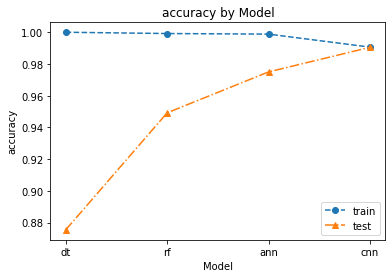

In [28]:
# 3.2 각 모델의 수행결과 정확도를 비교해본다. 
plt.plot(acc_train_dict.keys(),acc_train_dict.values(),'o--')
plt.plot(acc_test_dict.keys(), acc_test_dict.values(),'^-.')
plt.title ('accuracy by Model')
plt.xlabel('Model')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()